In [1]:
from pandas import read_csv
import numpy 
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score
import random
import pylab as pl

/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
series = read_csv('newmonthly.csv')
X = series.values
print(series.columns)
print(series)
print(series.describe())

Index(['Month', 'Asphalt and Road Oil Product Supplied',
       'Cooling Degree Days U.S. Average',
       'Heating Degree Days U.S. Average '],
      dtype='object')
      Month  Asphalt and Road Oil Product Supplied  \
0   2000-01                                   0.24   
1   2000-02                                   0.33   
2   2000-03                                   0.38   
3   2000-04                                   0.44   
4   2000-05                                   0.64   
5   2000-06                                   0.74   
6   2000-07                                   0.70   
7   2000-08                                   0.81   
8   2000-09                                   0.71   
9   2000-10                                   0.62   
10  2000-11                                   0.45   
11  2000-12                                   0.26   
12  2001-01                                   0.27   
13  2001-02                                   0.27   
14  2001-03            

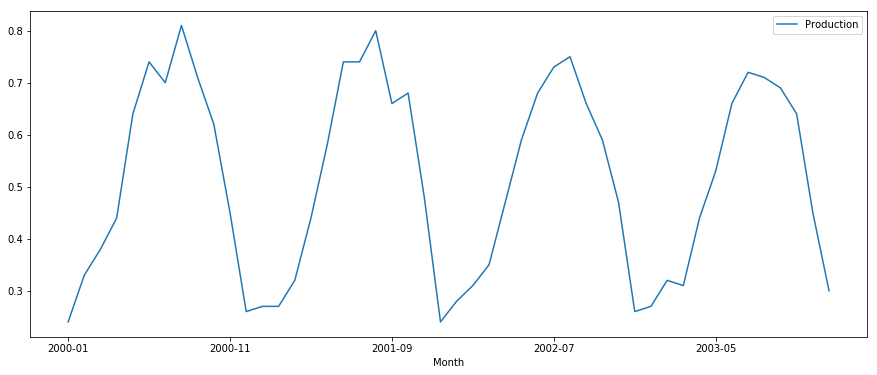

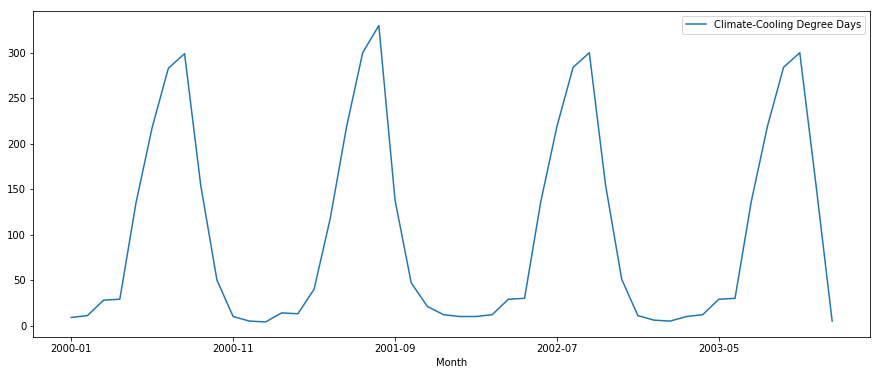

In [3]:
series.plot(x='Month',y='Asphalt and Road Oil Product Supplied',label='Production')
series.plot(x='Month',y='Cooling Degree Days U.S. Average',label='Climate-Cooling Degree Days')
#series.plot(x='Month',y='Heating Degree Days U.S. Average',label='Climate-Heating Degree Days')
pyplot.show(block=False)

In [4]:
series['Month'].values

array(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
       '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12',
       '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06',
       '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12',
       '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06',
       '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12',
       '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06',
       '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12'], dtype=object)

In [5]:
X = series['Asphalt and Road Oil Product Supplied'].values
size = int(len(X) * 0.77)
train,test = X[0:size], X[size:len(X)]

In [6]:
# create a differenced series
def difference(train, interval=1):
	diff = list()
	for i in range(interval, len(train)):
		value = train[i] - train[i - interval]
		diff.append(value)
	return diff

In [7]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [8]:
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
#X = X.astype('float32')
# difference data
#months_in_year = 12

#diff = difference(X, months_in_year)

In [9]:
train

array([ 0.24,  0.33,  0.38,  0.44,  0.64,  0.74,  0.7 ,  0.81,  0.71,
        0.62,  0.45,  0.26,  0.27,  0.27,  0.32,  0.44,  0.58,  0.74,
        0.74,  0.8 ,  0.66,  0.68,  0.48,  0.24,  0.28,  0.31,  0.35,
        0.47,  0.59,  0.68,  0.73,  0.75,  0.66,  0.59,  0.47,  0.26])

In [10]:
X1= series['Cooling Degree Days U.S. Average'].values
size1 = int(len(X1) * 0.77)
train1,test1 = X1[0:size1], X1[size1:len(X1)]

In [11]:
# create a differenced series
def difference(train1, interval=1):
	diff1= list()
	for i in range(interval, len(train1)):
		value1= train1[i] - train1[i - interval]
		diff1.append(value1)
	return diff1

In [12]:
# invert differenced value
def inverse_difference(history1, yhat1, interval=1):
	return yhat1 + history1[-interval]

In [13]:
# seasonal difference
X1 = series.values
days_in_year = 365
differenced1 = difference(X, days_in_year)
#X = X.astype('float32')
# difference data
#months_in_year = 12

#diff = difference(X, months_in_year)

In [14]:
train1

array([  9,  11,  28,  29, 135, 218, 283, 299, 154,  50,  10,   5,   4,
        14,  13,  40, 118, 218, 300, 330, 138,  47,  21,  12,  10,  10,
        12,  29,  30, 136, 219, 284, 300, 155,  51,  11])

In [15]:
history = [x for x in train]
predictions = list()
expected=list()

In [16]:
train

array([ 0.24,  0.33,  0.38,  0.44,  0.64,  0.74,  0.7 ,  0.81,  0.71,
        0.62,  0.45,  0.26,  0.27,  0.27,  0.32,  0.44,  0.58,  0.74,
        0.74,  0.8 ,  0.66,  0.68,  0.48,  0.24,  0.28,  0.31,  0.35,
        0.47,  0.59,  0.68,  0.73,  0.75,  0.66,  0.59,  0.47,  0.26])

In [17]:
history

[0.23999999999999999,
 0.33000000000000002,
 0.38,
 0.44,
 0.64000000000000001,
 0.73999999999999999,
 0.69999999999999996,
 0.81000000000000005,
 0.70999999999999996,
 0.62,
 0.45000000000000001,
 0.26000000000000001,
 0.27000000000000002,
 0.27000000000000002,
 0.32000000000000001,
 0.44,
 0.57999999999999996,
 0.73999999999999999,
 0.73999999999999999,
 0.80000000000000004,
 0.66000000000000003,
 0.68000000000000005,
 0.47999999999999998,
 0.23999999999999999,
 0.28000000000000003,
 0.31,
 0.34999999999999998,
 0.46999999999999997,
 0.58999999999999997,
 0.68000000000000005,
 0.72999999999999998,
 0.75,
 0.66000000000000003,
 0.58999999999999997,
 0.46999999999999997,
 0.26000000000000001]

In [18]:
for t in range(len(test)):
    model = ARIMA(history, order=(2,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    expected.append(obs)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    

predicted=0.190181, expected=0.270000
predicted=0.342832, expected=0.320000
predicted=0.401321, expected=0.310000
predicted=0.351689, expected=0.440000
predicted=0.534401, expected=0.530000
predicted=0.575229, expected=0.660000
predicted=0.696965, expected=0.720000
predicted=0.698364, expected=0.710000
predicted=0.648288, expected=0.690000
predicted=0.629620, expected=0.640000
predicted=0.574987, expected=0.450000
predicted=0.344761, expected=0.300000


In [19]:
#expectedx=[]
#predictedx=[]

In [20]:
error = mean_squared_error(test,predictions)
print('Test MSE: %.3f' % error)

Test MSE: 0.004


In [21]:
errorm=mean_absolute_error(test,predictions)

print('Test MAE: %.3f' % errorm)

Test MAE: 0.052


In [22]:
accuracy = 100-(errorm*100)
print('Test Accuracy: %.3f' % accuracy)

Test Accuracy: 94.767


In [23]:
#precision_score(test,predictions,average='macro')

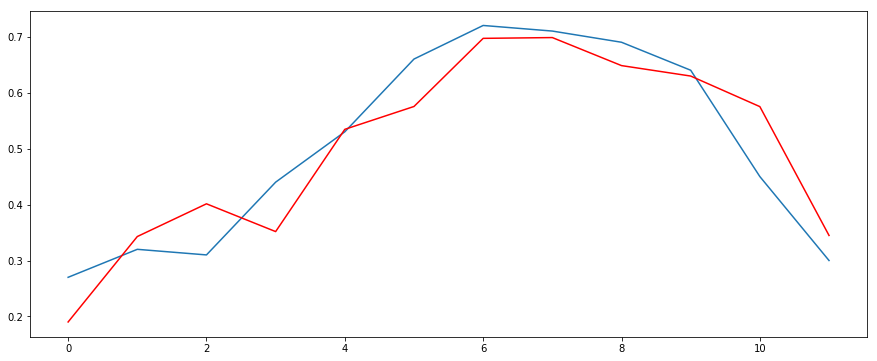

In [24]:
pyplot.plot(test)
pyplot.plot(predictions, color='red',label='Prediction')
pyplot.show()

In [25]:
history1 = [float(x) for x in train1]
predictions1 = list()
expected1=list()

In [26]:
train1

array([  9,  11,  28,  29, 135, 218, 283, 299, 154,  50,  10,   5,   4,
        14,  13,  40, 118, 218, 300, 330, 138,  47,  21,  12,  10,  10,
        12,  29,  30, 136, 219, 284, 300, 155,  51,  11])

In [27]:
history1

[9.0,
 11.0,
 28.0,
 29.0,
 135.0,
 218.0,
 283.0,
 299.0,
 154.0,
 50.0,
 10.0,
 5.0,
 4.0,
 14.0,
 13.0,
 40.0,
 118.0,
 218.0,
 300.0,
 330.0,
 138.0,
 47.0,
 21.0,
 12.0,
 10.0,
 10.0,
 12.0,
 29.0,
 30.0,
 136.0,
 219.0,
 284.0,
 300.0,
 155.0,
 51.0,
 11.0]

In [28]:
#for t in range(len(test)):
#    model = ARIMA(history, order=(2,0,0)) #******DIFFERENT PREDICTION HERE 1st feature*********#
#    model_fit = model.fit(disp=0)
#    output = model_fit.forecast()
#    yhat = output[0]
#    predictions.append(yhat)
#    obs = test[t]
#    history.append(obs)
#    print('predicted=%f, expected=%f' % (yhat, obs))

In [29]:
for t in range(len(test1)):
    model1 = ARIMA(history1, order=(2,0,0))
    model_fit1 = model1.fit(disp=0)
    output1 = model_fit1.forecast()
    yhat1 = output1[0]
    predictions1.append(yhat1)
    obs1 = test1[t]
    expected1.append(obs1)
    history1.append(obs1)
    print('predicted=%f, expected=%f' % (yhat1, obs1))

predicted=17.040323, expected=6.000000
predicted=38.300838, expected=5.000000
predicted=38.801262, expected=10.000000
predicted=44.807120, expected=12.000000
predicted=42.464184, expected=29.000000
predicted=63.471647, expected=30.000000
predicted=51.702396, expected=136.000000
predicted=196.437018, expected=219.000000
predicted=235.296207, expected=284.000000
predicted=268.008909, expected=300.000000
predicted=245.746724, expected=155.000000
predicted=26.732663, expected=5.000000


In [30]:
error1 = mean_squared_error(test1, predictions1)
print('Test MSE: %.3f' % error1)

Test MSE: 2013.019


In [31]:
error1m=mean_absolute_error(test1,predictions1)
print('Test MAE: %.3f' % error1m)

Test MAE: 37.743


In [32]:
accuracy = 100-(error1m*100)
print('Test Accuracy: %.3f' % accuracy)

Test Accuracy: -3674.335


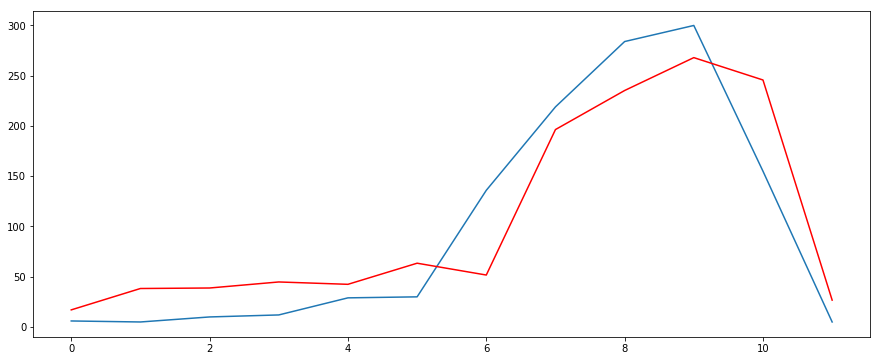

In [33]:
pyplot.plot(test1)
pyplot.plot(predictions1, color='red',label='Prediction-Cooling Degree')
pyplot.show()

In [34]:
expected=[6,5,10,12,29,30,136,219,284,300,155,5]
predicted=[17.040323,38.300838,38.801262,44.807120,42.464184,63.471647,51.702396,196.437018,235.296207,268.008909,245.746724,26.732663]

In [35]:
f1=f1_score(expected,predicted,average='micro')
print(f1)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [38]:
precision=precision_score(expected,predicted,average='macro')
print(precision)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [39]:
recall=recall_score(expected,predicted,average='macro')
print(recall)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [40]:
confusion=confusion_matrix(expected,predicted)
print(confusion)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [41]:
#def true_positives(_,predicted, labels, parameters):
 #   return int(confusion_matrix(labels, predicted)[1, 1]) 
  #  print(confusion_matrix(labels, predicted)[1, 1])

In [42]:
#def false_positives(_, predictions_binary, labels, parameters):
 #   return int(confusion_matrix(labels, predictions_binary)[0, 1]) 

In [43]:
#def true_negatives(_, predictions_binary, labels, parameters):
 #   return int(confusion_matrix(labels, predictions_binary)[0, 0]) 

In [44]:
#def false_negatives(_, predictions_binary, labels, parameters):
 #   return int(confusion_matrix(labels, predictions_binary)[1, 0]) 

In [45]:
#auc = roc_auc_score(expected, predicted,average='macro')

In [37]:
#def main():
def getConfusionMatrixPlot(expected, predicted):
    expected= [random.randint(1, 10) for i in range(100)]
    predicted= [random.randint(1, 10) for i in range(100)]
    pyplot = getConfusionMatrixPlot(expected, predicted)

In [46]:
# Compute confusion matrix
#def getConfusionMatrixPlot(test1, predictions1):
cm = confusion_matrix(expected,predicted)
print(cm)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [47]:
# create figure
fig = pyplot.figure()
pyplot.show()
# Show confusion matrix in a separate window
pyplot.matshow(cm)
pyplot.title('Confusion matrix')
pyplot.colorbar()
pyplot.ylabel('Test set')
pyplot.xlabel('Predictions')
pyplot.show()

NameError: name 'cm' is not defined

In [48]:
# prepare data for normalization
values = series['Cooling Degree Days U.S. Average'].values
values = values.reshape((len(values), 1))

In [49]:
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: 4.000000, Max: 330.000000


/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [50]:
# normalize the dataset and print the rows
normalized = scaler.transform(values)
for i in range(48):
	print(normalized[i])

[ 0.01533742]
[ 0.02147239]
[ 0.07361963]
[ 0.07668712]
[ 0.40184049]
[ 0.65644172]
[ 0.85582822]
[ 0.90490798]
[ 0.4601227]
[ 0.14110429]
[ 0.01840491]
[ 0.00306748]
[ 0.]
[ 0.03067485]
[ 0.02760736]
[ 0.11042945]
[ 0.34969325]
[ 0.65644172]
[ 0.90797546]
[ 1.]
[ 0.41104294]
[ 0.13190184]
[ 0.05214724]
[ 0.02453988]
[ 0.01840491]
[ 0.01840491]
[ 0.02453988]
[ 0.07668712]
[ 0.0797546]
[ 0.40490798]
[ 0.6595092]
[ 0.85889571]
[ 0.90797546]
[ 0.46319018]
[ 0.14417178]
[ 0.02147239]
[ 0.00613497]
[ 0.00306748]
[ 0.01840491]
[ 0.02453988]
[ 0.07668712]
[ 0.0797546]
[ 0.40490798]
[ 0.6595092]
[ 0.85889571]
[ 0.90797546]
[ 0.46319018]
[ 0.00306748]


In [51]:
# inverse transform and print the rows
inversed = scaler.inverse_transform(normalized)
for i in range(48):
	print(inversed[i])

[ 9.]
[ 11.]
[ 28.]
[ 29.]
[ 135.]
[ 218.]
[ 283.]
[ 299.]
[ 154.]
[ 50.]
[10.]
[ 5.]
[ 4.]
[ 14.]
[ 13.]
[ 40.]
[ 118.]
[ 218.]
[ 300.]
[ 330.]
[ 138.]
[ 47.]
[ 21.]
[ 12.]
[10.]
[10.]
[ 12.]
[ 29.]
[ 30.]
[ 136.]
[ 219.]
[ 284.]
[ 300.]
[ 155.]
[ 51.]
[ 11.]
[ 6.]
[ 5.]
[10.]
[ 12.]
[ 29.]
[ 30.]
[ 136.]
[ 219.]
[ 284.]
[ 300.]
[ 155.]
[ 5.]


In [52]:
X1=normalized
size1 = int(len(X1) * 0.77)
train1,test1 = X1[0:size1], X1[size1:len(X1)]

In [53]:
hist = [float(x) for x in normalized]
predictions1 = list()
expected1=list()

In [54]:
for t in range(len(test1)):
    model1 = ARIMA(hist, order=(2,0,0))
    model_fit1 = model1.fit(disp=0)
    output1 = model_fit1.forecast()
    yhat1 = output1[0]
    predictions1.append(yhat1)
    obs1 = test1[t]
    expected1.append(obs1)
    hist.append(obs1)
    print('predicted=%f, expected=%f' % (yhat1, obs1))

predicted=-0.237974, expected=0.006135
predicted=0.119665, expected=0.003067
predicted=0.108812, expected=0.018405
predicted=0.128157, expected=0.024540
predicted=0.121895, expected=0.076687
predicted=0.186202, expected=0.079755
predicted=0.150628, expected=0.404908
predicted=0.590774, expected=0.659509
predicted=0.706383, expected=0.858896
predicted=0.802587, expected=0.907975
predicted=0.732785, expected=0.463190
predicted=0.071643, expected=0.003067


In [55]:
expected1=[0.006135,0.003067,0.018405,0.024540,0.076687,0.079755,0.404908,0.659509,0.858896,0.907975,0.463190,0.003067]
predicted1=[-0.237974,0.119665,0.108812,0.128157,0.121895,0.186202,0.150628,0.590774,0.706383,0.802587,0.732785,0.071643]

In [56]:
error1 = mean_squared_error(test1, predictions1)
print('Test MSE: %.3f' % error1)

Test MSE: 0.024


In [57]:
error1m=mean_absolute_error(test1,predictions1)
print('Test MAE: %.3f' % error1m)

Test MAE: 0.135


In [58]:
accuracy = 100-(error1m*100)
print('Test Accuracy: %.3f' % accuracy)

Test Accuracy: 86.454


In [59]:
f2=f1_score(expected1,predicted1,average='micro')
print(f2)

ValueError: continuous is not supported

In [60]:
precision1=precision_score(expected,predicted,average='macro')
print(precision1)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [61]:
recall1=recall_score(expected,predicted,average='macro')
print(recall1)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [62]:
confusion1=confusion_matrix(expected,predicted)
print(confusion1)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [63]:
#def main():
def getConfusionMatrixPlot(expected1, predicted1):
    expected1 = [random.randint(1, 10) for i in range(100)]
    predicted1 = [random.randint(1, 10) for i in range(100)]
    pyplot = getConfusionMatrixPlot(expected1, predicted1)

In [64]:
# Compute confusion matrix
#def getConfusionMatrixPlot(test1, predictions1):
cm = confusion_matrix(expected1,predicted1)
print(cm)

ValueError: continuous is not supported

In [65]:
# create figure
fig = pyplot.figure()
pyplot.show()
# Show confusion matrix in a separate window
pyplot.matshow(cm)
pyplot.title('Confusion matrix')
pyplot.colorbar()
pyplot.ylabel('Test set')
pyplot.xlabel('Predictions')
pyplot.show()

NameError: name 'cm' is not defined

[array([ 0.19018062]), array([ 0.3428322]), array([ 0.40132064]), array([ 0.35168942]), array([ 0.53440068]), array([ 0.5752292]), array([ 0.6969651]), array([ 0.69836361]), array([ 0.64828794]), array([ 0.62961959]), array([ 0.57498709]), array([ 0.34476082])]
48
12
<built-in method index of list object at 0x7fbd736dcc88>


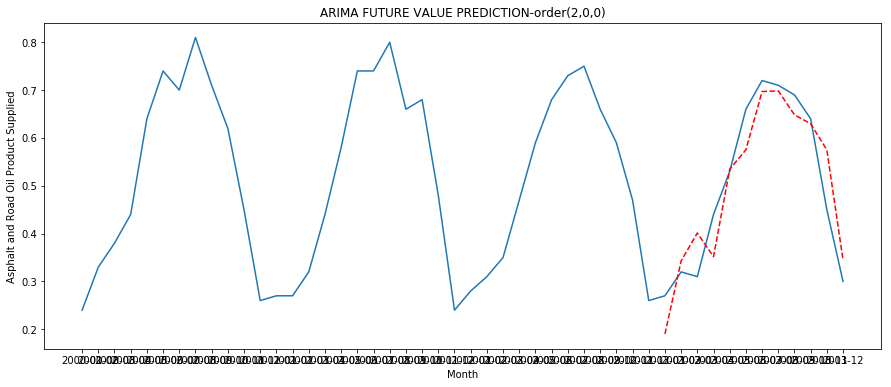

In [70]:
ts=series.Month
ts.head()
pyplot.title('ARIMA FUTURE VALUE PREDICTION-order(2,0,0)')
Month1 = series['Month'].values
Month2 = series['Month'].values[36:]
#Month3 = series['Month'].values
#Month4 = series['Month'].values[36:]
pyplot.plot(Month1,history,label='Actual')
pyplot.plot(Month2,predictions,'r--',label='Predicted')
#pyplot.plot(Month3,history1,label='Actual1')
#pyplot.plot(Month4,predictions1,'r--',label='Predicted1')
print(predictions)
print(len(history))
print(len(predictions))
print(predictions.index)
pyplot.xlabel('Month')
pyplot.ylabel('Asphalt and Road Oil Product Supplied')

pyplot.show()

[array([-0.23797381]), array([ 0.11966453]), array([ 0.10881226]), array([ 0.12815687]), array([ 0.12189472]), array([ 0.18620227]), array([ 0.1506277]), array([ 0.59077446]), array([ 0.70638293]), array([ 0.80258661]), array([ 0.73278495]), array([ 0.07164301])]
48
12
<built-in method index of list object at 0x7fbd736bd988>


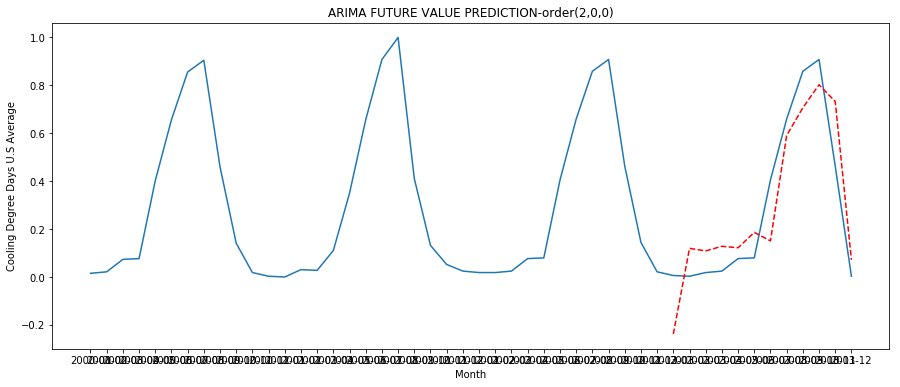

In [72]:
#ts=series.Month
#ts.head()
pyplot.title('ARIMA FUTURE VALUE PREDICTION-order(2,0,0)')
#Month1 = series['Month'].values
#Month2 = series['Month'].values[36:]
Month3 = series['Month'].values
Month4 = series['Month'].values[36:]
#pyplot.plot(Month1,history,label='Actual')
#pyplot.plot(Month2,predictions,'r--',label='Predicted')
pyplot.plot(Month3,normalized,label='Actual1')
pyplot.plot(Month4,predictions1,'r--',label='Predicted1')
print(predictions1)
print(len(normalized))
print(len(predictions1))
print(predictions1.index)
pyplot.xlabel('Month')
pyplot.ylabel('Cooling Degree Days U.S Average')
pyplot.show()